# Bonus Work for SQL-Challenge


In [1]:
# enable jupyter notebook to load from the .env file. I installed python-dotenv for this.
%load_ext dotenv
%dotenv
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pull database url from .env file
database_url = os.environ.get('DATABASE_URL')
    
from sqlalchemy import create_engine

engine = create_engine(database_url)

connection = engine.connect()

## Import tables from the Postgres employee database into Pandas.

In [3]:
# import employees table into a pandas df
employee_df = pd.read_sql_query('select * from employees',con=engine)

# import salaries table into a pandas df
salary_df = pd.read_sql_query('select * from salaries',con=engine)

#import title table into a pandas df
title_df = pd.read_sql_query('select * from titles',con=engine)

# merge employee df and salary df
employee_final_df = pd.merge(employee_df, salary_df, left_on=['emp_no'], right_on=['emp_no'])

# merge employee final df and title df
employee_final_df = pd.merge(employee_final_df, title_df, left_on=['emp_title_id'], right_on=['title_id'])

In [8]:
employee_final_df.count()

emp_no          300024
emp_title_id    300024
birth_date      300024
first_name      300024
last_name       300024
sex             300024
hire_date       300024
salary          300024
title_id        300024
title           300024
clean_salary    300024
dtype: int64

## Create a histogram to visualize the most common salary ranges for employees

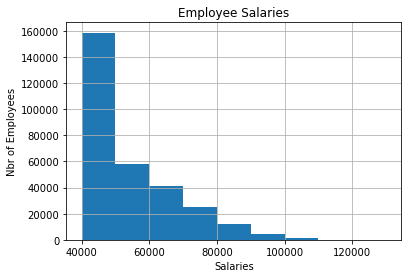

In [5]:
# create a new clean salary field without commas and dollar signes
employee_final_df['clean_salary'] = employee_final_df[employee_final_df.columns[7:8]] = employee_final_df[employee_final_df.columns[7:8]].replace('[\$,]', '', regex=True).astype(float)


# create a salary list
salaries = employee_final_df['clean_salary'].tolist()


# define the bins to use in the histogram
salary_bins = [40000,50000,60000,70000,80000,90000,100000,110000,120000,130000]

fig,ax = plt.subplots()

x = np.array(salaries)

ax.hist(x, bins = salary_bins)
ax.set_title("Employee Salaries")
ax.set_xlabel('Salaries')
ax.set_ylabel('Nbr of Employees')
plt.grid()
plt.show()

## Create a bar chart of average salary by title

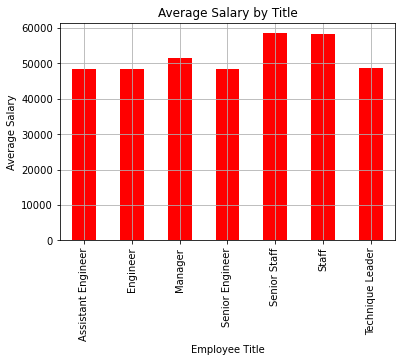

In [6]:
amp_group_title_df = employee_final_df.groupby('title')['clean_salary'].mean()


count_chart = amp_group_title_df.plot(kind='bar', color="red")

plt.title("Average Salary by Title")
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")

plt.grid()
plt.show()


## Epilogue

In [7]:
# it was all an April Fools...
epilogue =  employee_final_df.loc[employee_final_df['emp_no'] == 499942]

epilogue

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title,clean_salary
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000.0,e0004,Technique Leader,40000.0
